In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_df, city_df, how="outer", on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

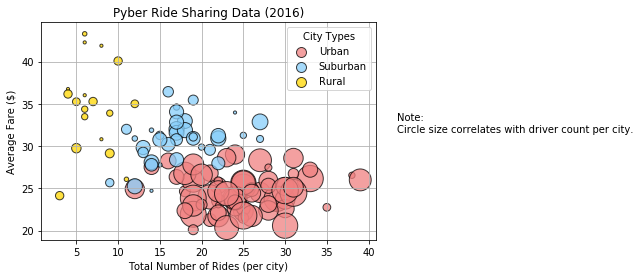

In [3]:
# Separating the 3 different city types into different dataframes
urban_df = combined_df[combined_df["type"] == "Urban"]
suburb_df = combined_df[combined_df["type"] == "Suburban"]
rural_df = combined_df[combined_df["type"] == "Rural"]

# Counting the rides, the average fare, and the driver count in every city in the urban areas
df_2 = urban_df.groupby(["city"])
data = {"Rides": df_2["city"].count(),
        "Fare":df_2["fare"].mean(), 
        "Drivers":df_2["driver_count"].mean()}
df_3 = pd.DataFrame(data)

# Counting the rides, the average fare, and the driver count in every city in the suburban areas
df_4 = suburb_df.groupby(["city"])
data = {"Rides": df_4["city"].count(),
        "Fare":df_4["fare"].mean(), 
        "Drivers":df_4["driver_count"].mean()}
df_5 = pd.DataFrame(data)

# Counting the rides, the average fare, and the driver count in every city in the rural areas
df_6 = rural_df.groupby(["city"])
data = {"Rides": df_6["city"].count(),
        "Fare":df_6["fare"].mean(), 
        "Drivers":df_6["driver_count"].mean()}
df_7 = pd.DataFrame(data)

# Defining the bubble plot
plt.scatter(x = df_3['Rides'],
            y = df_3['Fare'],
            s = df_3['Drivers']*10,
            color="lightcoral",
            edgecolor="black",
            alpha=0.75, 
            linewidths=1)
plt.scatter(x = df_5['Rides'],
            y = df_5['Fare'],
            s = df_5['Drivers']*10,
            color="lightskyblue",
            edgecolor="black",
            alpha=0.75, 
            linewidths=1)
plt.scatter(x = df_7['Rides'],
            y = df_7['Fare'],
            s = df_7['Drivers']*10,
            color="gold",
            edgecolor="black",
            alpha=0.75, 
            linewidths=1)
lgnd=plt.legend(labels=["Urban", "Suburban", "Rural"], loc="best", title="City Types")
plt.figtext(0.95, .5, "Note: \nCircle size correlates with driver count per city.", rotation="horizontal")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Saving figure
plt.savefig("pyber_graph.png")

## Total Fares by City Type

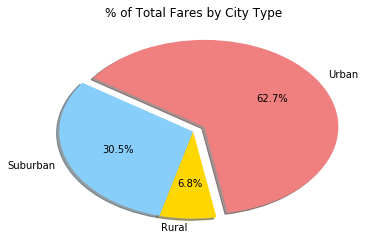

In [13]:
# Defining Pie Chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urban_df["fare"].sum()/combined_df["fare"].sum(), 
         suburb_df["fare"].sum()/combined_df["fare"].sum(), 
         rural_df["fare"].sum()/combined_df["fare"].sum()]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
plt.show
plt.savefig("pyber_fare.png")

## Total Rides by City Type

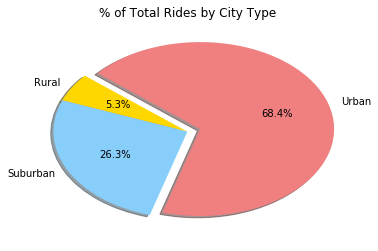

In [14]:
# Defining Pie Chart
labels = ["Rural", "Suburban", "Urban"]
sizes = [rural_df.shape[0]/combined_df.shape[0], 
         suburb_df.shape[0]/combined_df.shape[0], 
         urban_df.shape[0]/combined_df.shape[0]]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show
plt.savefig("pyber_rides.png")

## Total Drivers by City Type

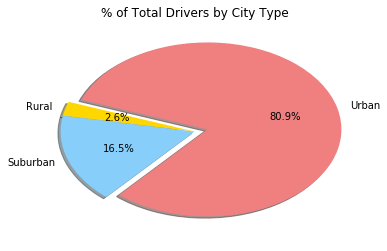

In [15]:
# Creating a new DataFrame with the driver counts in each of the 3 city types
type_sum = city_df.groupby('type').sum()

# Defining Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(type_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.show
plt.savefig("pyber_drivers.png")